In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#MODELO 1: Regresión logística
from sklearn.linear_model import LogisticRegression

#MODELO 2: KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score
from sklearn.metrics import classification_report

## DATAFRAME

In [20]:
df = pd.read_csv("../data/raw/hair_health.csv")
df.head()

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss
0,1,Yes,Yes,Yes,No,No,Yes,50,Yes,Yes,No,No,1
1,2,No,Yes,Yes,No,No,Yes,18,No,Yes,No,No,1
2,3,No,No,No,Yes,No,No,68,No,Yes,No,Yes,1
3,4,Yes,No,Yes,No,Yes,Yes,22,Yes,No,No,No,1
4,5,Yes,No,Yes,No,Yes,No,30,Yes,Yes,Yes,Yes,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Id                        1000 non-null   int64 
 1   Genetics                  1000 non-null   object
 2   Hormonal Changes          1000 non-null   object
 3   Medical Conditions        1000 non-null   object
 4   Medications & Treatments  1000 non-null   object
 5   Nutritional Deficiencies  1000 non-null   object
 6   Stress                    1000 non-null   object
 7   Age                       1000 non-null   int64 
 8   Poor Hair Care Habits     1000 non-null   object
 9   Environmental Factors     1000 non-null   object
 10  Smoking                   1000 non-null   object
 11  Weight Loss               1000 non-null   object
 12  Hair Loss                 1000 non-null   int64 
dtypes: int64(3), object(10)
memory usage: 101.7+ KB


In [22]:
df.describe()

,Id,Age,Hair Loss
count,1000.000000,1000.000000,1000.000000
mean,500.500000,43.718000,0.684000
std,288.819436,14.505409,0.465146
min,1.000000,18.000000,0.000000
25%,250.750000,31.000000,0.000000
50%,500.500000,44.000000,1.000000
75%,750.250000,56.000000,1.000000
max,1000.000000,69.000000,1.000000


## VISUALIZACIONES

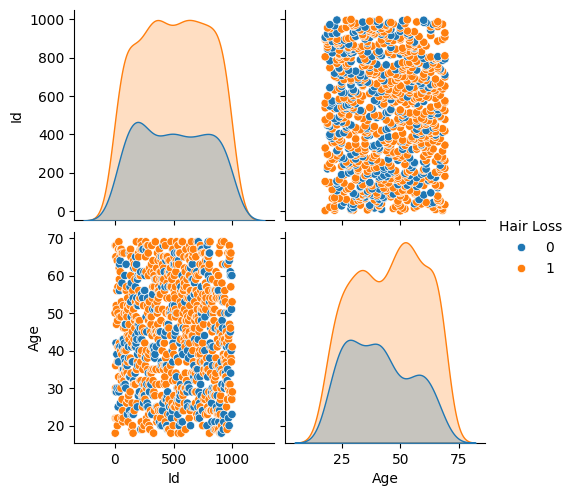

In [23]:
sns.pairplot(df, hue = "Hair Loss")

<Axes: >

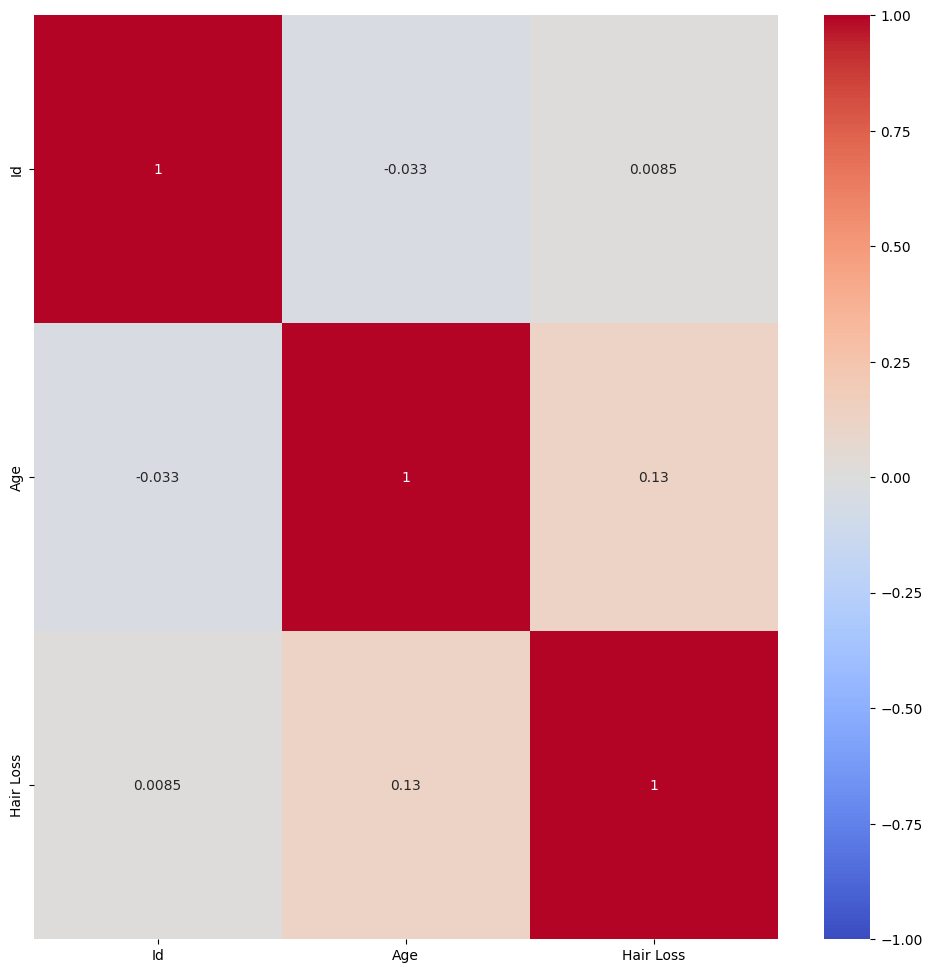

In [24]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

## LIMPIEZA

In [25]:
df["Environmental Factors"].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
print(df["Genetics"].value_counts().unique())
print(df["Hormonal Changes"].value_counts().unique())
print(df["Poor Hair Care Habits"].value_counts().unique())
print(df["Environmental Factors"].value_counts().unique())
print(df["Smoking"].value_counts().unique())
print(df["Weight Loss"].value_counts().unique())
print(df["Hair Loss"].value_counts().unique())

	

[712 288]
[570 430]
[524 476]
[590 410]
[706 294]
[701 299]
[684 316]


In [27]:
df['Hair Loss'].unique()


array([1, 0])

In [28]:
from sklearn.preprocessing import OrdinalEncoder

orden = [['No','Yes']]

encoder = OrdinalEncoder(categories=orden)
df['Genetics_encoder'] = encoder.fit_transform(df[['Genetics']])

encoder = OrdinalEncoder(categories=orden)
df['Hormones_encoder'] = encoder.fit_transform(df[['Hormonal Changes']])

encoder = OrdinalEncoder(categories=orden)
df['HairCare_encoder'] = encoder.fit_transform(df[['Poor Hair Care Habits']])

encoder = OrdinalEncoder(categories=orden)
df['Environment_encoder'] = encoder.fit_transform(df[['Environmental Factors']])

encoder = OrdinalEncoder(categories=orden)
df['Smoking_encoder'] = encoder.fit_transform(df[['Smoking']])

encoder = OrdinalEncoder(categories=orden)
df['Weight_encoder'] = encoder.fit_transform(df[['Weight Loss']])


df

,Id,Genetics,Hormonal Changes,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Poor Hair Care Habits,Environmental Factors,Smoking,Weight Loss,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,1,Yes,Yes,Yes,No,No,Yes,50,Yes,Yes,No,No,1,1.0,1.0,1.0,1.0,0.0,0.0
1,2,No,Yes,Yes,No,No,Yes,18,No,Yes,No,No,1,0.0,1.0,0.0,1.0,0.0,0.0
2,3,No,No,No,Yes,No,No,68,No,Yes,No,Yes,1,0.0,0.0,0.0,1.0,0.0,1.0
3,4,Yes,No,Yes,No,Yes,Yes,22,Yes,No,No,No,1,1.0,0.0,1.0,0.0,0.0,0.0
4,5,Yes,No,Yes,No,Yes,No,30,Yes,Yes,Yes,Yes,1,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Yes,No,No,No,No,No,60,Yes,No,No,No,0,1.0,0.0,1.0,0.0,0.0,0.0
996,997,No,No,Yes,Yes,Yes,Yes,23,No,No,No,Yes,0,0.0,0.0,0.0,0.0,0.0,1.0
997,998,Yes,Yes,Yes,Yes,Yes,No,53,Yes,No,No,No,1,1.0,1.0,1.0,0.0,0.0,0.0
998,999,No,Yes,Yes,No,No,Yes,41,No,Yes,No,No,1,0.0,1.0,0.0,1.0,0.0,0.0


## VISUALIZACIONES 2

<Axes: >

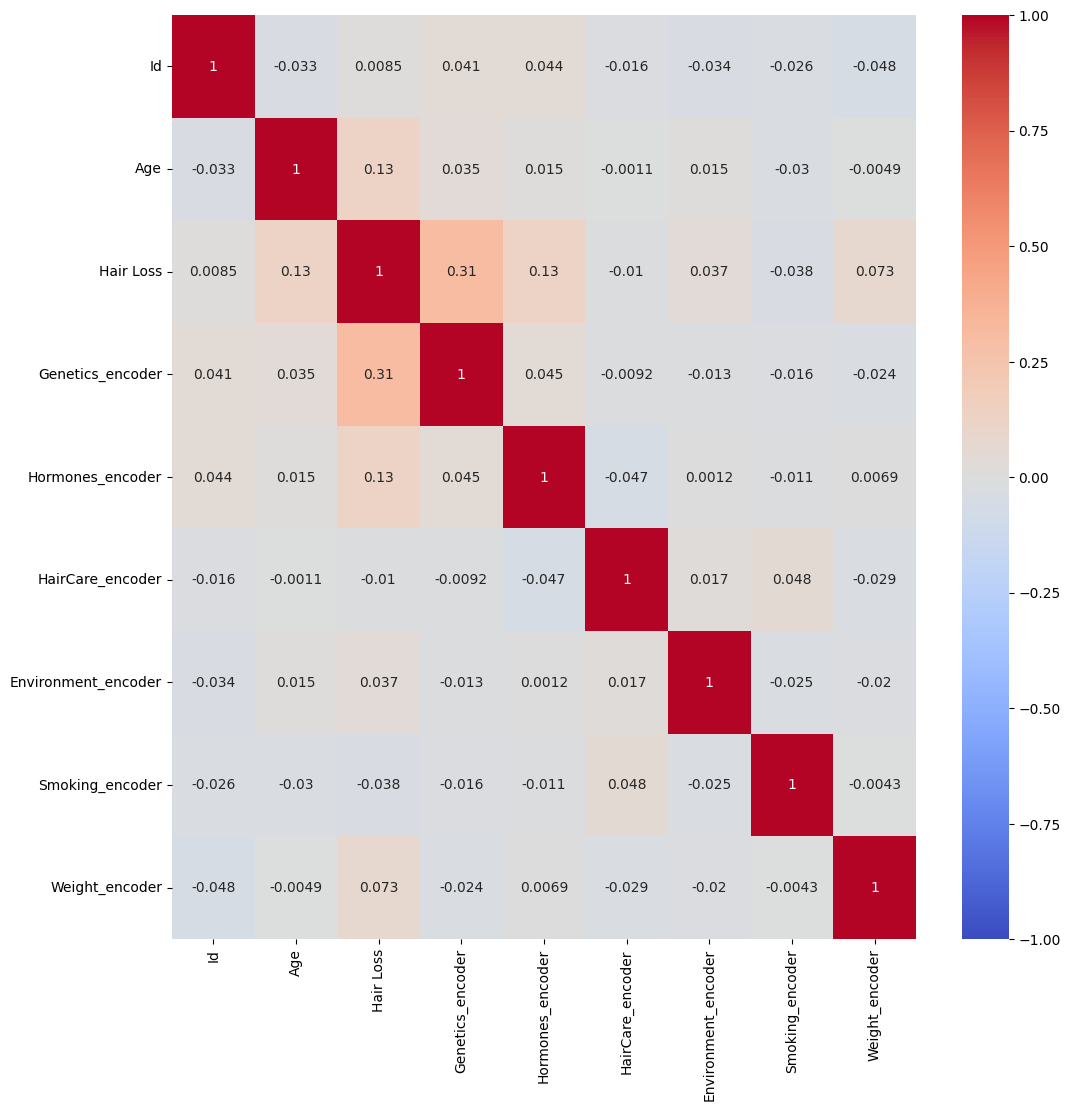

In [29]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(numeric_only= True), annot= True, cmap= "coolwarm", vmin=-1, )

In [30]:
df = df.drop(columns = ["Genetics", "Hormonal Changes", "Poor Hair Care Habits","Environmental Factors", "Smoking", "Weight Loss"])

In [31]:
df


,Id,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,1,Yes,No,No,Yes,50,1,1.0,1.0,1.0,1.0,0.0,0.0
1,2,Yes,No,No,Yes,18,1,0.0,1.0,0.0,1.0,0.0,0.0
2,3,No,Yes,No,No,68,1,0.0,0.0,0.0,1.0,0.0,1.0
3,4,Yes,No,Yes,Yes,22,1,1.0,0.0,1.0,0.0,0.0,0.0
4,5,Yes,No,Yes,No,30,1,1.0,0.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,No,No,No,No,60,0,1.0,0.0,1.0,0.0,0.0,0.0
996,997,Yes,Yes,Yes,Yes,23,0,0.0,0.0,0.0,0.0,0.0,1.0
997,998,Yes,Yes,Yes,No,53,1,1.0,1.0,1.0,0.0,0.0,0.0
998,999,Yes,No,No,Yes,41,1,0.0,1.0,0.0,1.0,0.0,0.0


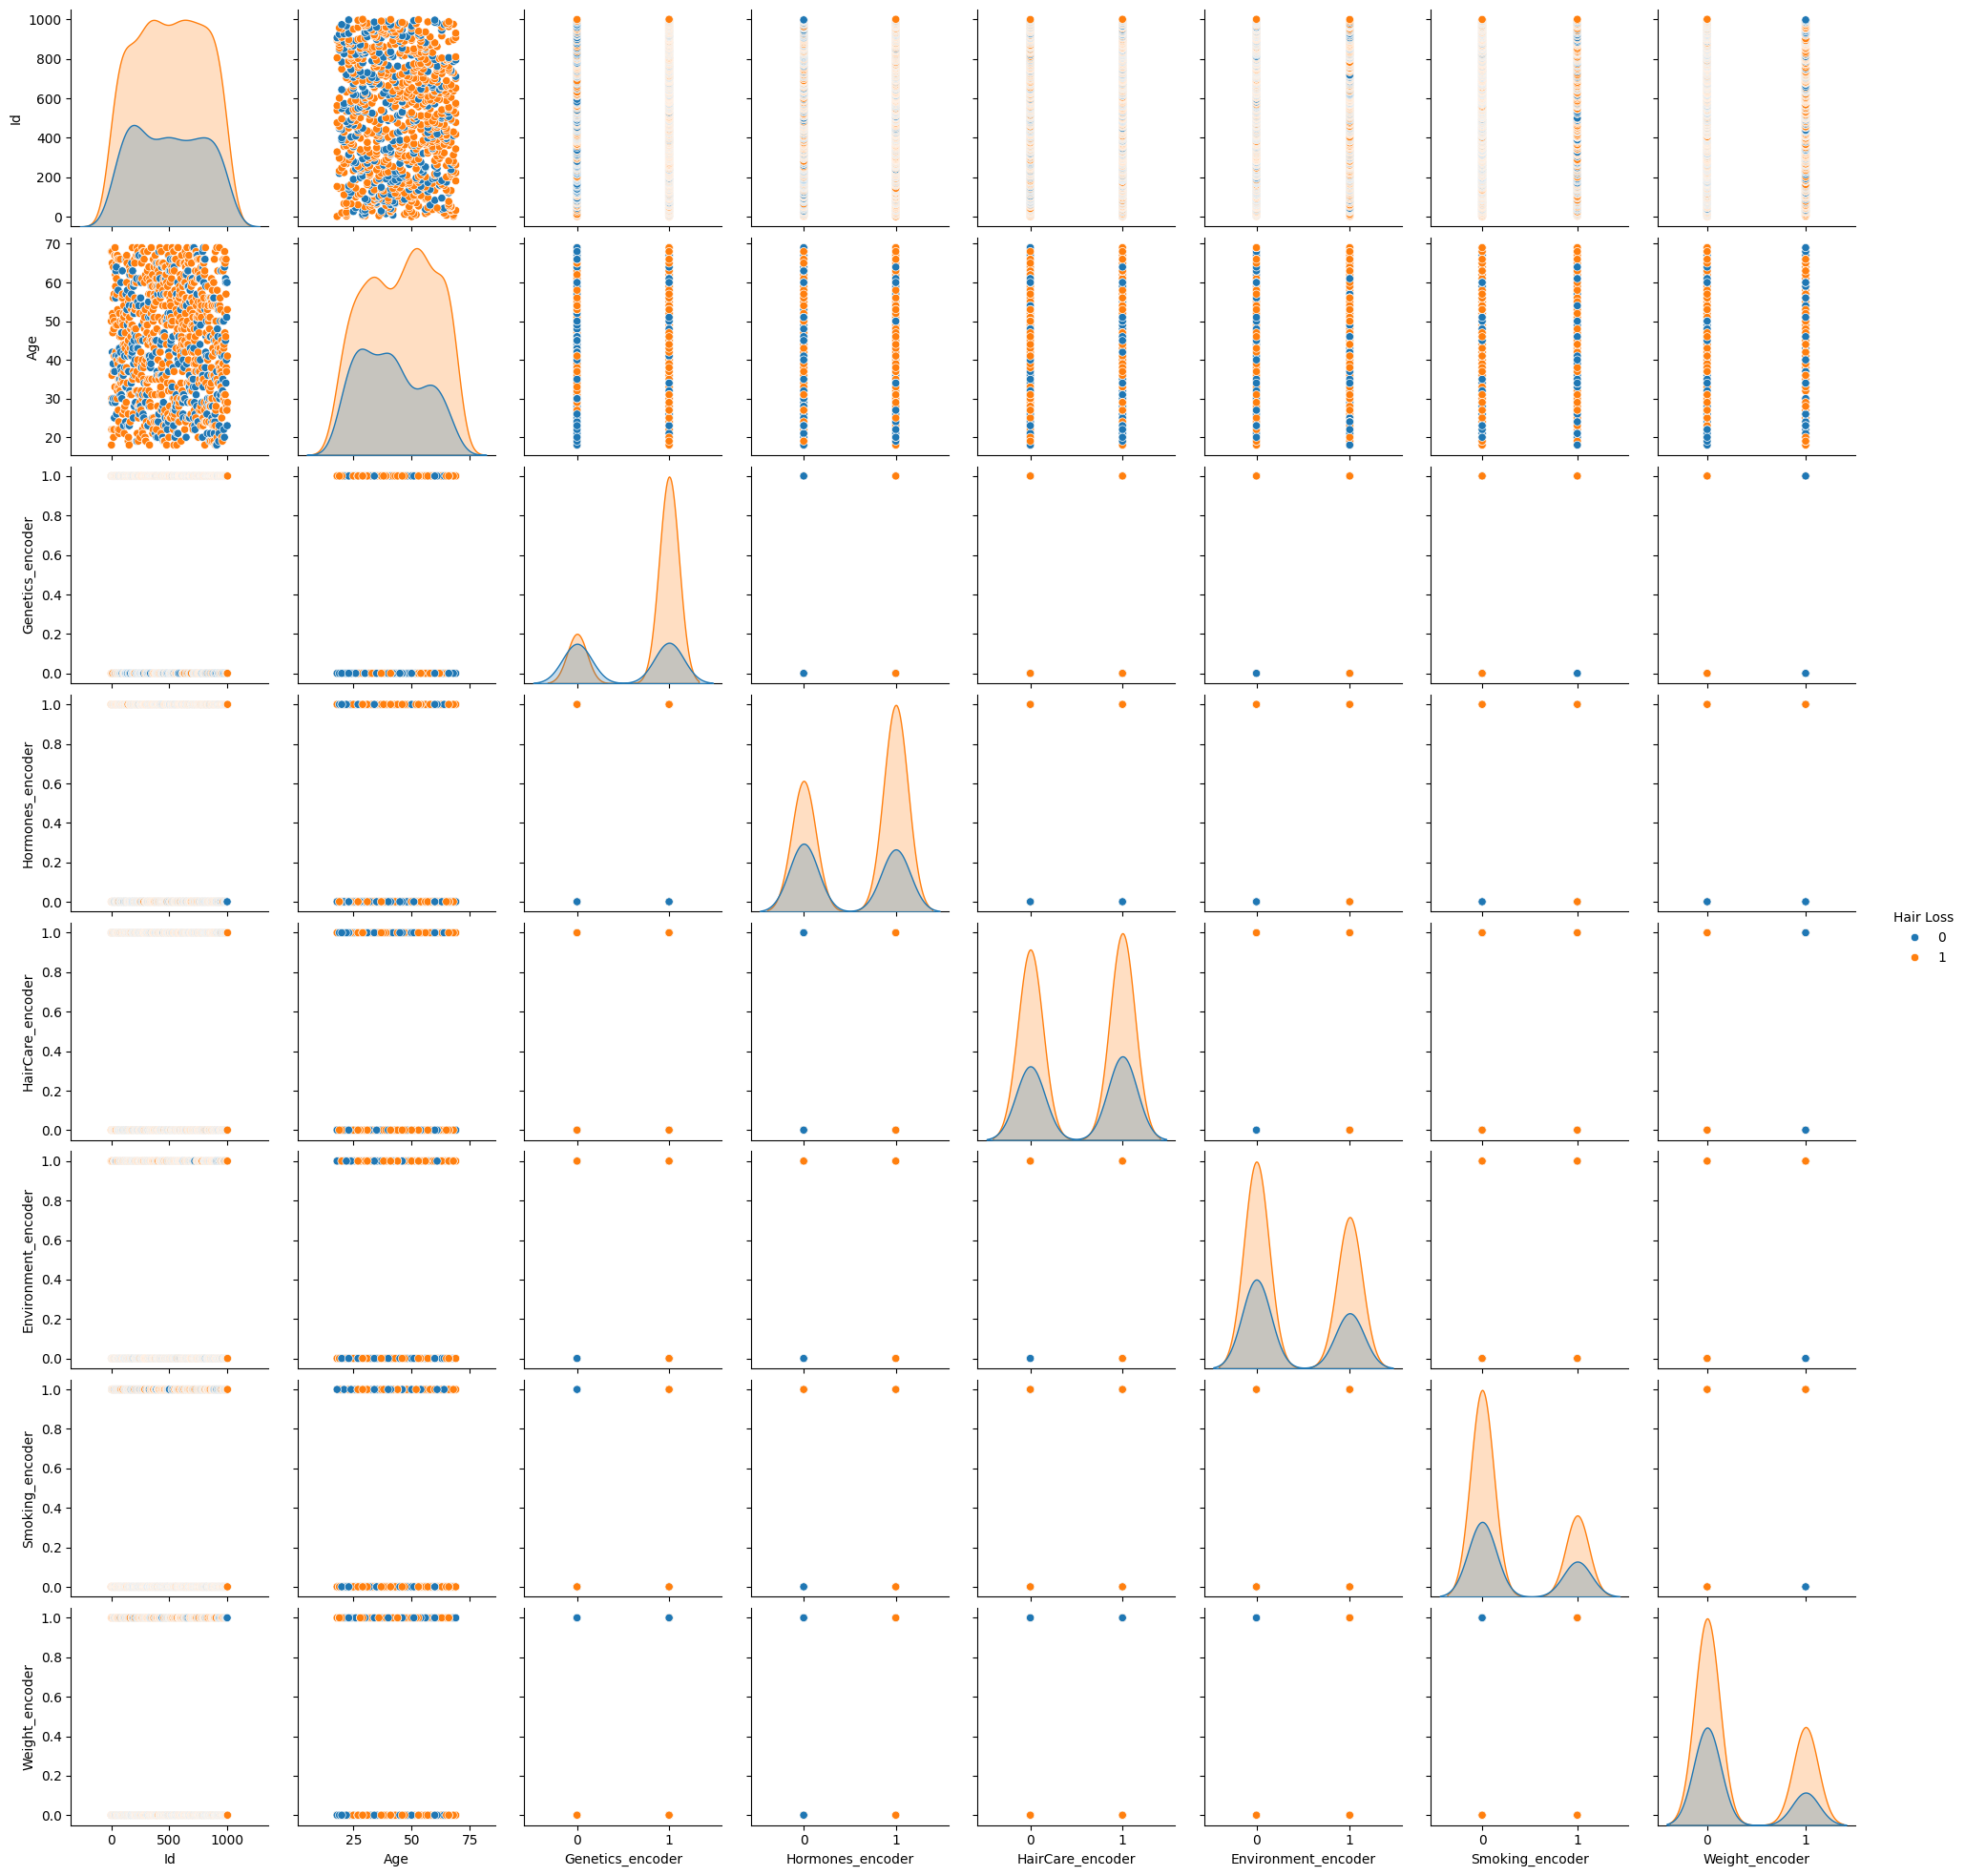

In [32]:
sns.pairplot(df, hue = "Hair Loss")

## MODELO 1: LOGISTIC REGRESSION

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        1000 non-null   int64  
 1   Medical Conditions        1000 non-null   object 
 2   Medications & Treatments  1000 non-null   object 
 3   Nutritional Deficiencies  1000 non-null   object 
 4   Stress                    1000 non-null   object 
 5   Age                       1000 non-null   int64  
 6   Hair Loss                 1000 non-null   int64  
 7   Genetics_encoder          1000 non-null   float64
 8   Hormones_encoder          1000 non-null   float64
 9   HairCare_encoder          1000 non-null   float64
 10  Environment_encoder       1000 non-null   float64
 11  Smoking_encoder           1000 non-null   float64
 12  Weight_encoder            1000 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 101.7+ KB


In [34]:
df.describe()

,Id,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,43.718000,0.684000,0.712000,0.570000,0.524000,0.410000,0.29400,0.299000
std,288.819436,14.505409,0.465146,0.453058,0.495323,0.499674,0.492079,0.45582,0.458049
min,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,250.750000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,500.500000,44.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000
75%,750.250000,56.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000
max,1000.000000,69.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000


In [35]:
X = df[["Age","Genetics_encoder", "Hormones_encoder", 
        "HairCare_encoder", "Environment_encoder","Smoking_encoder","Weight_encoder", "Stress" ]]
y = df["Hair Loss"]

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X, y)

ValueError: could not convert string to float: 'Yes'

In [ ]:
predictions = model.predict(X)
print(predictions)

ValueError: could not convert string to float: 'Yes'

In [ ]:
predicions_proba = model.predict_proba(X)
print(np.round(np.array(predicions_proba), 2))

[[0.46 0.54]
 [0.57 0.43]
 [0.47 0.53]
 ...
 [0.48 0.52]
 [0.54 0.46]
 [0.47 0.53]]


In [ ]:
model.score(X, y)

0.5455455455455456

## MODELO 2: KNN

In [ ]:
df.head()

,Id,Medical Conditions,Medications & Treatments,Nutritional Deficiencies,Stress,Age,Hair Loss,Genetics_encoder,Hormones_encoder,HairCare_encoder,Environment_encoder,Smoking_encoder,Weight_encoder
0,133992,No Data,No Data,Magnesium deficiency,1,19,0,1.0,0.0,1.0,1.0,0.0,0.0
1,148393,Eczema,Antibiotics,Magnesium deficiency,2,43,0,0.0,0.0,1.0,1.0,0.0,0.0
2,155074,Dermatosis,Antifungal Cream,Protein deficiency,1,26,0,0.0,0.0,1.0,1.0,0.0,1.0
3,118261,Ringworm,Antibiotics,Biotin Deficiency,1,46,0,1.0,1.0,1.0,1.0,0.0,0.0
4,111915,Psoriasis,Accutane,Iron deficiency,1,30,1,0.0,0.0,0.0,1.0,1.0,0.0


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'Stress'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Hair Loss'}>,
        <Axes: title={'center': 'Genetics_encoder'}>,
        <Axes: title={'center': 'Hormones_encoder'}>],
       [<Axes: title={'center': 'HairCare_encoder'}>,
        <Axes: title={'center': 'Environment_encoder'}>,
        <Axes: title={'center': 'Smoking_encoder'}>],
       [<Axes: title={'center': 'Weight_encoder'}>, <Axes: >, <Axes: >]],
      dtype=object)

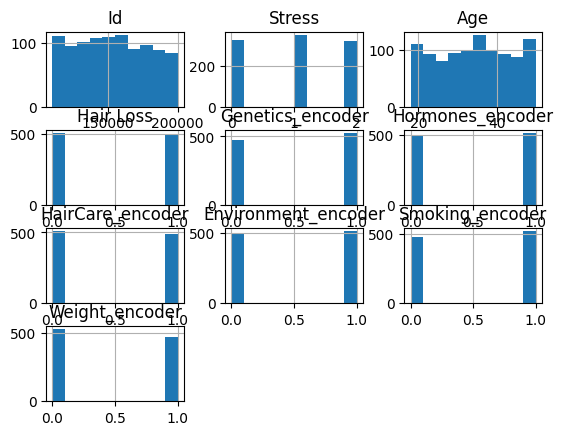

In [ ]:
df.hist()

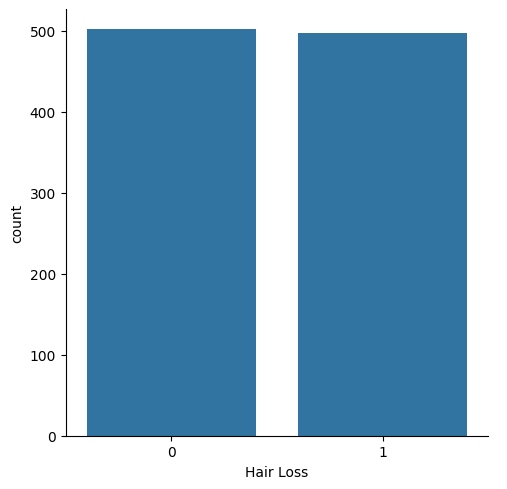

In [ ]:
sns.catplot(x= "Hair Loss", data = df, kind="count")


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(799, 8)
(799,)
(200, 8)
(200,)


In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaler.fit(X)
X_train_scaler = minmax_scaler.transform(X_train)
X_test_scaler = minmax_scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 4)
knn.fit(X_train_scaler, y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
pred = knn.predict(X_test_scaler)

print("Accuracy: ", accuracy_score(y_test, pred))
print("precision: ", precision_score(y_test, pred, average="micro"))
print("Recall: ", recall_score(y_test, pred, average="micro"))

Accuracy:  0.6
precision:  0.6
Recall:  0.6


<Axes: >

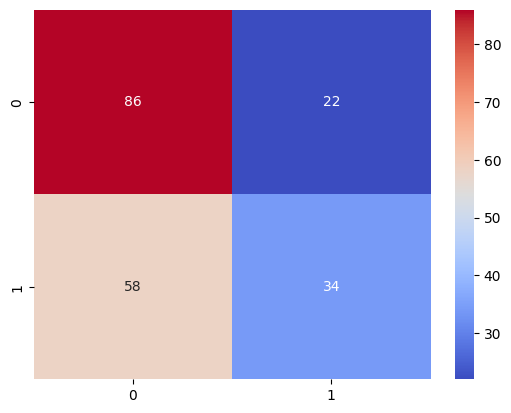

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred), cmap = "coolwarm",annot= True)

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.60      0.80      0.68       108
           1       0.61      0.37      0.46        92

    accuracy                           0.60       200
   macro avg       0.60      0.58      0.57       200
weighted avg       0.60      0.60      0.58       200



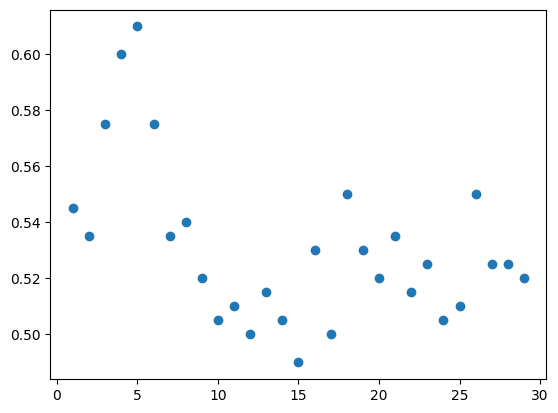

In [ ]:
k_range = range(1,30)
scores = []

for i in k_range:
    knn =KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_scaler, y_train)
    pred_scores = knn.score(X_test_scaler, y_test)
    scores.append(pred_scores)

plt.scatter(k_range, scores)

In [ ]:
scores

[0.545,
 0.535,
 0.575,
 0.6,
 0.61,
 0.575,
 0.535,
 0.54,
 0.52,
 0.505,
 0.51,
 0.5,
 0.515,
 0.505,
 0.49,
 0.53,
 0.5,
 0.55,
 0.53,
 0.52,
 0.535,
 0.515,
 0.525,
 0.505,
 0.51,
 0.55,
 0.525,
 0.525,
 0.52]

In [ ]:
df['Hair Loss'].value_counts(normalize=True)

Hair Loss
0    0.502503
1    0.497497
Name: proportion, dtype: float64